The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
#importing libraries

import pandas as pd
import numpy as np
#Plot Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Model Building
from sklearn.preprocessing import StandardScaler
import sklearn
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf
#Model Validation
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

# Load Dataset


In [2]:
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

# Data Analysis & Data Visualization


In [4]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

<AxesSubplot:xlabel='NOX', ylabel='Density'>

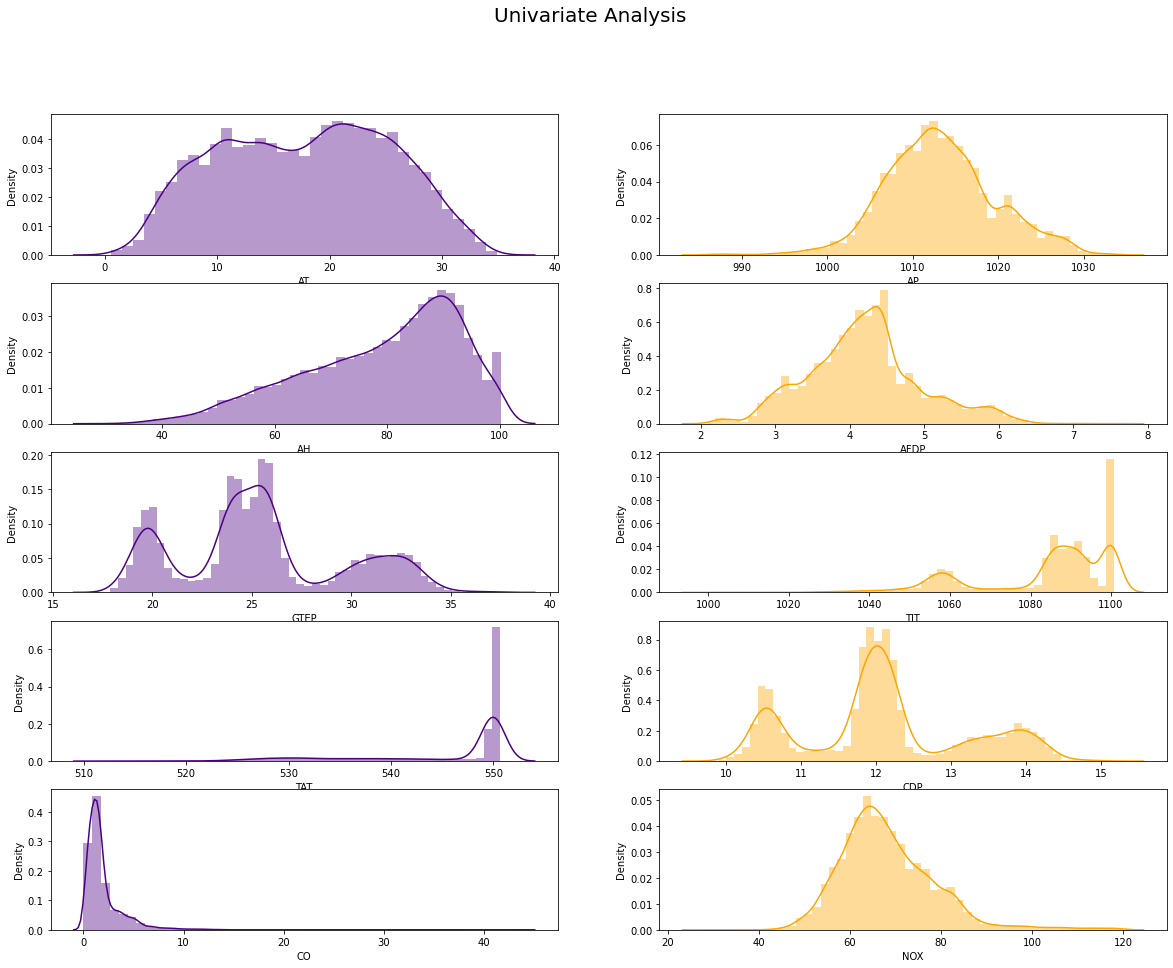

In [5]:
import warnings
warnings.filterwarnings("ignore")

fig,axes=plt.subplots(5,2,figsize=(20,15))
plt.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(data['AT'],ax=axes[0,0],color='indigo')
sns.distplot(data['AP'],ax=axes[0,1],color='orange')
sns.distplot(data['AH'],ax=axes[1,0],color='indigo')   
sns.distplot(data['AFDP'],ax=axes[1,1],color='orange')
sns.distplot(data['GTEP'],ax=axes[2,0],color='indigo')
sns.distplot(data['TIT'],ax=axes[2,1],color='orange')
sns.distplot(data['TAT'],ax=axes[3,0],color='indigo')
sns.distplot(data['CDP'],ax=axes[3,1],color='orange')
sns.distplot(data['CO'],ax=axes[4,0],color='indigo')
sns.distplot(data['NOX'],ax=axes[4,1],color='orange')


<AxesSubplot:xlabel='TEY', ylabel='Density'>

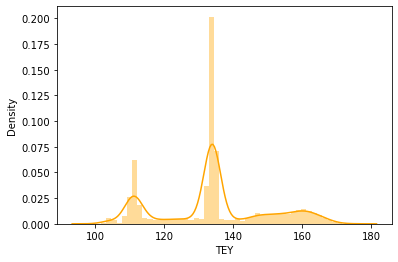

In [6]:
sns.distplot(data['TEY'],color='orange')


<AxesSubplot:xlabel='NOX', ylabel='TEY'>

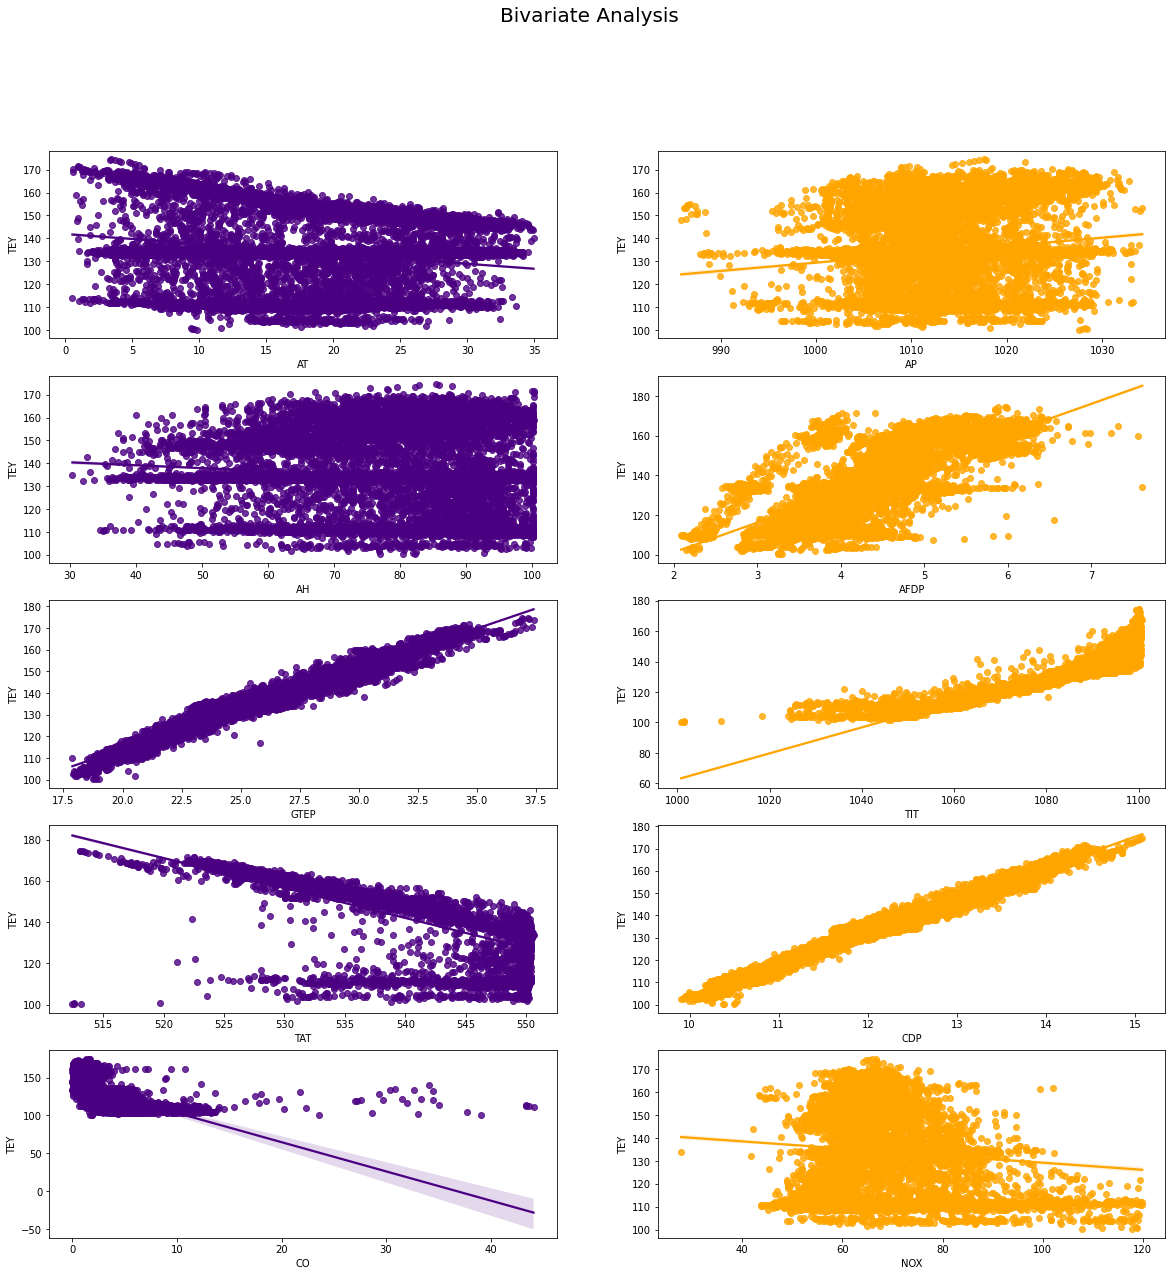

In [7]:
fig,axes=plt.subplots(5,2,figsize=(20,20))
plt.suptitle('Bivariate Analysis',fontsize=20)
sns.regplot(x='AT',y='TEY',data=data,ax=axes[0,0],color='indigo')
sns.regplot(x="AP",y="TEY",data=data,ax=axes[0,1],color='orange')
sns.regplot(x="AH",y="TEY",data=data,ax=axes[1,0],color='indigo')
sns.regplot(x="AFDP",y="TEY",data=data,ax=axes[1,1],color='orange')
sns.regplot(x="GTEP",y="TEY",data=data,ax=axes[2,0],color='indigo')
sns.regplot(x="TIT",y="TEY",data=data,ax=axes[2,1],color='orange')
sns.regplot(x="TAT",y="TEY",data=data,ax=axes[3,0],color='indigo')
sns.regplot(x="CDP",y="TEY",data=data,ax=axes[3,1],color='orange')
sns.regplot(x="CO",y="TEY",data=data,ax=axes[4,0],color='indigo')
sns.regplot(x="NOX",y="TEY",data=data,ax=axes[4,1],color='orange')

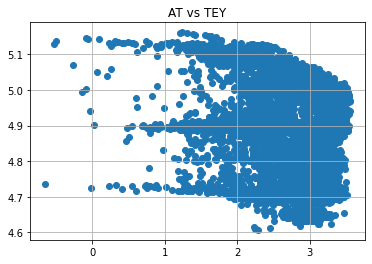

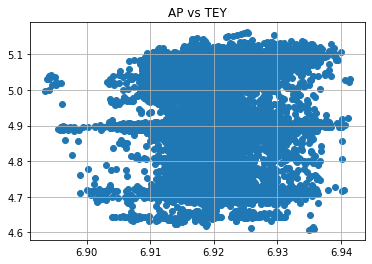

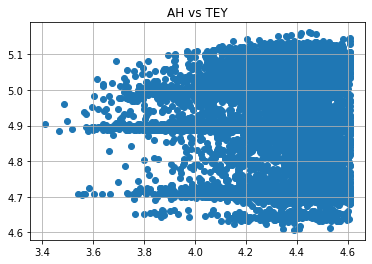

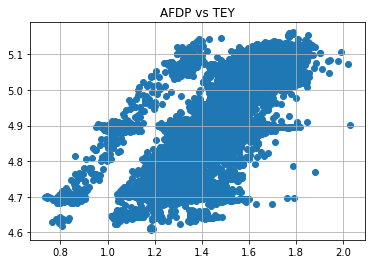

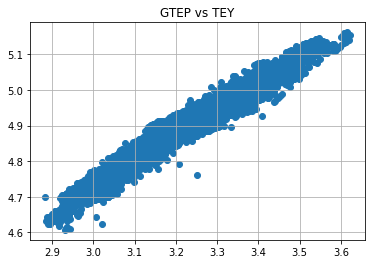

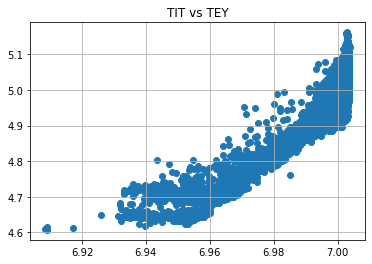

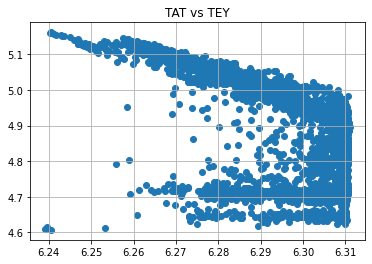

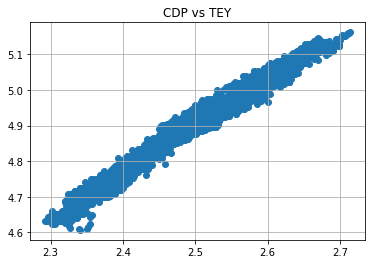

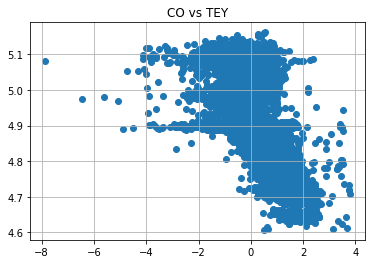

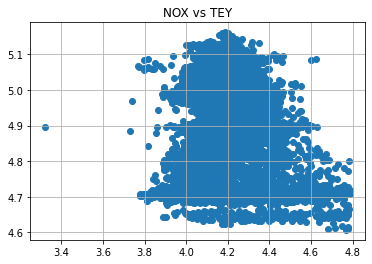

In [8]:
for i in data.columns:
    if i!="TEY": 
        plt.scatter(np.log(data[i]), np.log(data['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

<AxesSubplot:>

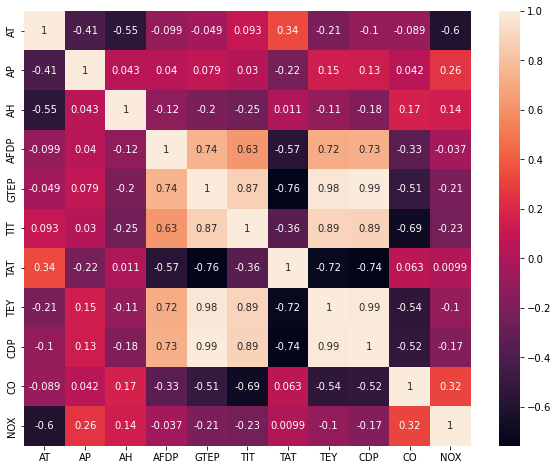

In [9]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)

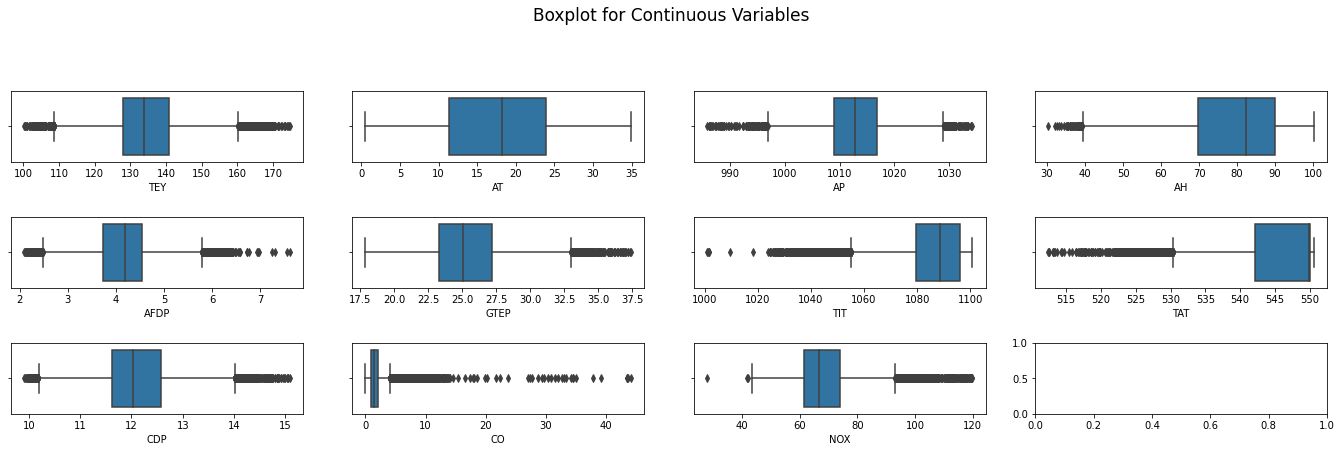

In [10]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(data.TEY, ax=ax[0,0])
sns.boxplot(data.AT, ax=ax[0,1])
sns.boxplot(data.AP, ax=ax[0,2])
sns.boxplot(data.AH, ax=ax[0,3])
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1])
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[1,3])
sns.boxplot(data.CDP, ax=ax[2,0])
sns.boxplot(data.CO, ax=ax[2,1])
sns.boxplot(data.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [11]:
df = data.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)


In [12]:
df.shape

(15039, 7)

In [13]:
#Converting independent features into normalised and standardized data
#Standardize & Normalize the data

std = StandardScaler()
df_std = pd.DataFrame(std.fit_transform(df), columns=df.columns)  


In [14]:
#Take a smaller sample to build a model

temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1) 

In [15]:
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
3033,-0.066293,0.175845,0.526478,0.572528,-0.022014,0.085797,-0.528821
3645,-0.046824,0.113072,0.411516,0.636089,-0.078239,-0.071026,-0.296472
3282,-1.041994,-1.269608,-1.579135,0.590325,-1.539464,-1.462483,1.478805
11005,-1.429144,-1.291890,-1.476275,0.573799,-1.354994,-1.341920,0.098689
11679,-0.416477,0.119302,0.599085,0.578884,-0.025804,0.142905,-0.610161
...,...,...,...,...,...,...,...
13056,-0.312027,0.024663,0.447820,0.582698,0.071484,0.089422,-0.641213
14479,-1.060411,-1.528846,-1.809058,0.556003,-1.577368,-1.648313,0.711524
4249,0.362952,0.296839,0.659591,0.606851,-0.024541,0.167380,-0.223884
12259,-0.194948,0.160751,0.605136,0.531850,-0.025804,0.249871,-0.542578


In [16]:
#Splitting data into target variable and independent variables



In [17]:

x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
3033,-0.066293,0.175845,0.526478,0.572528,0.085797,-0.528821
3645,-0.046824,0.113072,0.411516,0.636089,-0.071026,-0.296472
3282,-1.041994,-1.269608,-1.579135,0.590325,-1.462483,1.478805
11005,-1.429144,-1.291890,-1.476275,0.573799,-1.341920,0.098689
11679,-0.416477,0.119302,0.599085,0.578884,0.142905,-0.610161
...,...,...,...,...,...,...
13056,-0.312027,0.024663,0.447820,0.582698,0.089422,-0.641213
14479,-1.060411,-1.528846,-1.809058,0.556003,-1.648313,0.711524
4249,0.362952,0.296839,0.659591,0.606851,0.167380,-0.223884
12259,-0.194948,0.160751,0.605136,0.531850,0.249871,-0.542578


In [18]:
#Creating train and test data for model validation



In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((1128, 6), (376, 6), (1128,), (376,))

In [20]:
#Build a Model

import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [21]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [22]:

model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [23]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [24]:

model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [25]:

epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)
     

Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________
CPU times: tota

In [26]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)
     

36/36 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0486 - mape: 183.5477

 Results for model 2: 
 Training Loss: 0.004361022729426622 
 Training Mean Absolute Error: 0.004361022729426622 
 Training Mean Squared Error: 0.04856054112315178


In [27]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)
     


12/12 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0606 - mape: 108.1139

 Results for model 2: 
 Test Loss: 0.007209585048258305 
 Test Mean Absolute Error: 0.007209585048258305 
 Test Mean Squared Error: 0.06057792529463768


In [28]:
#Train and test errors are also quiet similar, which means our model is not overfitted or underfitted.

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,20]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)
     

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.011 total time=   2.8s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.012 total time=   2.5s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.017 total time=   2.7s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.026 total time=   2.5s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................
[CV 5/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.029 total time=   2.5s
[CV 1/5; 2/6] START batch_size=10, epochs=20....................................
[CV 1/5; 2/6] END ....batch_size=10, epochs=20;, 

In [31]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.010812130942940711, using {'batch_size': 40, 'epochs': 20}
-0.01927484553307295,0.0072542254670970125 with: {'batch_size': 10, 'epochs': 10}
-0.011683507636189461,0.001993305352244708 with: {'batch_size': 10, 'epochs': 20}
-0.01994847059249878,0.0037179057084921053 with: {'batch_size': 20, 'epochs': 10}
-0.01737771425396204,0.007038115134401597 with: {'batch_size': 20, 'epochs': 20}
-0.012125858291983604,0.0011076198585513331 with: {'batch_size': 40, 'epochs': 10}
-0.010812130942940711,0.00175515001240131 with: {'batch_size': 40, 'epochs': 20}


In [32]:
#get best value for learning rate and dropuout by hyperparameter tuning

# Defining the model

def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = Adam(0.001)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [33]:
 #Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.012691061198711395, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.012691061198711395,0.002148565348807067 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.0137521181255579,0.0026823072779448413 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.013372272253036499,0.003023582963825128 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.016202105581760405,0.002191290211947492 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.014865903742611408,0.0022812591009018445 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.015368253737688065,0.0032367262628671322 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.02433300521224737,0.006718747659441119 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.02153063639998436,0.006060357258313219 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.018516096845269205,0.0052104770602751935 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [34]:

# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning
def create_model_three_hidden_layers(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = init,activation = activation_function))

    model.add(Dense(32,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(64,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(128,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(1))
    
    adam = Adam(0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)


In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
     

Best : -0.012731429189443588, using {'activation_function': 'relu', 'init': 'normal'}
-1.0098986744880676,0.05368940527769352 with: {'activation_function': 'softmax', 'init': 'uniform'}
-1.0097694516181945,0.05347164400863677 with: {'activation_function': 'softmax', 'init': 'normal'}
-1.0099467635154724,0.05331572315029601 with: {'activation_function': 'softmax', 'init': 'zero'}
-0.013833830133080482,0.0034427094747878774 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.012731429189443588,0.0033055973845859342 with: {'activation_function': 'relu', 'init': 'normal'}
-1.009658122062683,0.05340966200393423 with: {'activation_function': 'relu', 'init': 'zero'}
-0.025233013555407524,0.0019865989613131714 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.025510217249393462,0.0026507971942879415 with: {'activation_function': 'tanh', 'init': 'normal'}
-1.009896743297577,0.05463744167561719 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.02313399873673916,0.0020987

In [ ]:
# Defining the model
#get best value for neuron by hyperparameter tuning
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)
     

In [37]:

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
     

Best : -0.01203593797981739, using {'neuron1': 16, 'neuron2': 128, 'neuron3': 128, 'neuron4': 64}
-0.02096434570848942,0.0066113900384443145 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
-0.016529160924255847,0.004598156079271854 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
-0.01756876241415739,0.007656262265897755 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
-0.01948724240064621,0.008990593596971701 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
-0.015160734020173549,0.0029714479316365686 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
-0.013194245658814907,0.0017817758945638399 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
-0.01614898834377527,0.004590601340237572 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
-0.015125375427305698,0.0050434789695708105 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
-0.01497099306434393,0.002

In [38]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [39]:

epochs=40
batch_size=10

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)
     

Here is the summary of our final model:
Model: "sequential_546"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2729 (Dense)          (None, 8)                 56        
                                                                 
 dense_2730 (Dense)          (None, 128)               1152      
                                                                 
 dense_2731 (Dense)          (None, 64)                8256      
                                                                 
 dense_2732 (Dense)          (None, 128)               8320      
                                                                 
 dense_2733 (Dense)          (None, 1)                 129       
                                                                 
Total params: 17,913
Trainable params: 17,913
Non-trainable params: 0
_________________________________________________________________


In [40]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)
     

36/36 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0662 - mape: 111.7817

 Results for final model : 
 Training Loss: 0.00827973522245884 
 Training Mean Absolute Error: 0.00827973522245884 
 Training Mean Squared Error: 0.06620468199253082
